<a href="https://colab.research.google.com/github/Logan-Stark/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
df


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,86961,No,"Not employed, and not looking for work","Computer science, computer engineering, or sof...","Back-end developer;C-suite executive (CEO, CTO...",9-11 years,9-11 years,180000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;Python;Ruby;HTML;CSS;Bash/Shell,Male,25 - 34 years old,Middle Eastern
2757,87004,"Yes, full-time","Not employed, and not looking for work","Another engineering discipline (ex. civil, ele...",Full-stack developer;Student,3-5 years,0-2 years,36716.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;PHP;SQL;TypeScript;Delphi/Object...,Male,25 - 34 years old,White or of European descent
2758,87054,"Yes, part-time","Not employed, but looking for work","Information systems, information technology, o...",Back-end developer;Data or business analyst;Da...,0-2 years,3-5 years,2904.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Less than a month,C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample_1 = df.sample(20, random_state= 42)
sample_2 = df.sample(200, random_state= 42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [8]:
print(sample_1['ConvertedSalary'].mean())
print(sample_2['ConvertedSalary'].mean())
print(df.mean())

55752.2
68551.255
Unnamed: 0         41208.962332
ConvertedSalary    73453.404201
dtype: float64


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

- I would trust the second sample more because it has a much bigger sample size. i think a non technical audience would be able to choose correctly if explained in plain english.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

- They seem very far apart to me. i would say that the there is a good bit of sampling error

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



- Normally this is where confidence levels and intervals would come into place. We would be able to say how sure we are between a given set of numbers . without it though we could explain reasons why we might be off and try to give a ballpark kind of prediction using standard deviation.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
# Make a function for Confidence intervals

def confidence_intervals(data, confidence=.95):
  
  # make sure we have a numpy array to work with
  sample = np.array(data)
  
  # sample mean
  x_bar = sample.mean()
  
  # sample size
  n = len(sample)
  
  # Standard deviation
  s = np.std(sample, ddof=1)
  
  # standard error
  std_error = (s / np.sqrt(n))
  
  # T statistic
  t = stats.t.ppf((1+confidence)/ 2, n-1)
  
  # Margin of error
  moe = t*std_error
 
  # make upper and lower variables
  upper = x_bar + moe
  lower = x_bar - moe

  return ( lower, x_bar, upper)



In [0]:
# I made a new function using our old function to find moe and xbar instead 


def moe_and_xbar(data, confidence=.95):
  
  # make sure we have a numpy array to work with
  sample = np.array(data)
  
  # sample mean
  x_bar = sample.mean()
  
  # sample size
  n = len(sample)
  
  # Standard deviation
  s = np.std(sample, ddof=1)
  
  # standard error
  std_error = (s / np.sqrt(n))
  
  # T statistic
  t = stats.t.ppf((1+confidence)/ 2, n-1)
  
  # Margin of error
  moe = t*std_error
 
  # make upper and lower variables
  upper = x_bar + moe
  lower = x_bar - moe

  return ( x_bar, moe)



In [16]:
confidence_intervals(sample_1['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463)

- We can say with a 95% confidence level that the population estimate for ConvertedSalary is between 35,805.1 and 75,699.29

In [17]:
confidence_intervals(sample_2['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092)

- We can say with a 95% confidence level that the population estimate for ConvertedSalary is between 60,593.05 and 76,509.45

**2) Which confidence interval is wider and why?**

- Sample 1 has a much bigger confidence interval. This is likely due to its small sample size leading to a much bigger margin of error. 

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [22]:
# using New function
moe_and_xbar(sample_1['ConvertedSalary'])

(55752.2, 19947.096903744638)

In [23]:
moe_and_xbar(sample_2['ConvertedSalary'])

(68551.255, 7958.196195520917)

In [30]:
# after checking leacture notes this is a much better way to report
# sample mean and moe
print("Sample_1 Convertedsalary Estimate 1")
print("Mean:", CI1[1])
print("MOE:", CI1[2]-CI1[1])

Sample_1 Convertedsalary Estimate 1
Mean: 55752.2
MOE: 19947.096903744634


In [31]:
print("Sample_2 Convertedsalary Estimate 1")
print("Mean:", CI2[1])
print("MOE:", CI2[2]-CI2[1])

Sample_2 Convertedsalary Estimate 1
Mean: 68551.255
MOE: 7958.196195520912


- The margin of error gives us an idea of how far of our estimate might be from the population estimate with a 95% confidence. basically we are saying that we are 95% confident that the population estimate is within 1.96 standard deviations from our sample mean.

In [28]:
# creating variables for plotting
CI1 = confidence_intervals(sample_1['ConvertedSalary'])
CI1

(35805.10309625536, 55752.2, 75699.29690374463)

In [29]:
CI2 = confidence_intervals(sample_2['ConvertedSalary'])
CI2 

(60593.058804479086, 68551.255, 76509.45119552092)

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

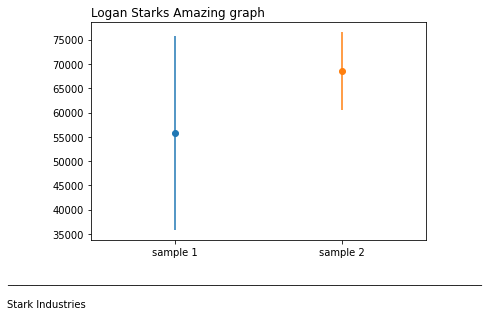

In [45]:
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('Logan Starks Amazing graph', loc='Left')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.text(s='Stark Industries', x= -1, y= 20000)
plt.text(s='_______________________________________________________________________________________________', x= -1, y= 25000)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

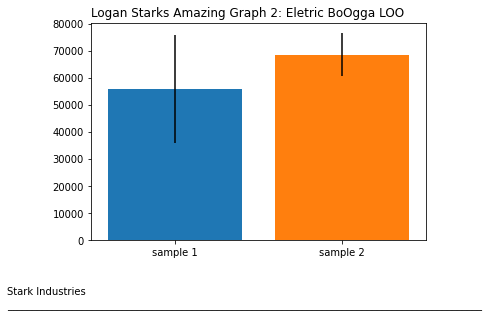

In [51]:
plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]))
plt.bar(x=1, height=CI2[1], yerr=(CI2[2]-CI2[1]))
plt.title('Logan Starks Amazing Graph 2: Eletric BoOgga LOO', loc='Left')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.text(s='Stark Industries', x= -1, y= -20000)
plt.text(s='_______________________________________________________________________________________________', x= -1, y= -25000)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [25]:
confidence_intervals(df['ConvertedSalary'])

(71299.82986224785, 73453.40420137631, 75606.97854050477)

In [26]:
moe_and_xbar(df['ConvertedSalary'])

(73453.40420137631, 2153.574339128457)

- We can say with a 95% confidence level that the population estimate for ConvertedSalary is between 71,299.82 and 75,606.97. this is much more precise than our previous confidence intervals. our population estimate for ConvertedSalary is now within $2,153.57 of the estimate.

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

- Precision in statistics refers to how tightly grouped our data is. For example, our second sample is more precise because its margin of eroor is much smaller and we are looking at a much smaller group of data compared to sample_1. Accuracy refers to how close our sample estimate actually is to our population estimate.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

- A 95% confidence level conveys that out of 100 studies done on our data, 95 of them would have a population mean that falls within its confidence intervals.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.